In [84]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()

df_X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_y = pd.Series(diabetes.target)



In [85]:
X = df_X.values

In [86]:
y = df_y.values 

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
import numpy as np

W = np.ones(X_train.shape[1])
b = 0

def model(X, W, b):
    predictions = 0
    for i in range(X.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [89]:
def MSE(y_pred, y_true):
    mse = ((y_pred - y_true) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    return MSE(predictions, y)

In [90]:
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b) - y
    dW = (2/N) * np.dot(X.T,y_pred )
    db = (2/N) * np.sum(y_pred)
    return dW, db


In [96]:
LEARNING_RATE = 0.01


In [97]:
losses = []

for epoch in range(1, 200001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db

    L = loss(X_train, W, b, y_train)
    losses.append(L)

    if epoch % 10000 == 0:
        print(f"Epoch {epoch} : Loss {L:.4f}")


Epoch 10000 : Loss 3077.0407
Epoch 20000 : Loss 3061.4643
Epoch 30000 : Loss 3047.3725
Epoch 40000 : Loss 3034.6051
Epoch 50000 : Loss 3023.0230
Epoch 60000 : Loss 3012.5047
Epoch 70000 : Loss 3002.9434
Epoch 80000 : Loss 2994.2445
Epoch 90000 : Loss 2986.3239
Epoch 100000 : Loss 2979.1068
Epoch 110000 : Loss 2972.5261
Epoch 120000 : Loss 2966.5218
Epoch 130000 : Loss 2961.0400
Epoch 140000 : Loss 2956.0320
Epoch 150000 : Loss 2951.4541
Epoch 160000 : Loss 2947.2669
Epoch 170000 : Loss 2943.4348
Epoch 180000 : Loss 2939.9256
Epoch 190000 : Loss 2936.7101
Epoch 200000 : Loss 2933.7621


In [98]:
test_loss = loss(X_test, W, b, y_test)
print(f"Test MSE: {test_loss:.4f}")


Test MSE: 2864.6246


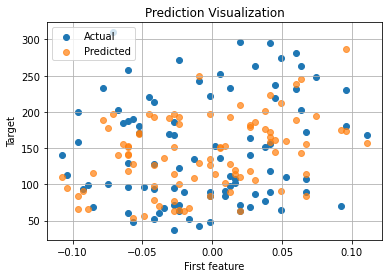

In [100]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label="Actual")
plt.scatter(X_test[:, 0], model(X_test, W, b), label="Predicted", alpha=0.7)
plt.xlabel("First feature")
plt.ylabel("Target")
plt.title("Prediction Visualization")
plt.legend()
plt.grid(True)
plt.show()
